Step 1: Load the MNIST Dataset
The MNIST dataset can be easily loaded using Keras. The dataset consists of 60,000 training images and 10,000 testing images of handwritten digits (0-9) in grayscale, each of size 28x28 pixel.s

In [1]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


Step 2: Display the First Five Images in the Training Dataset
To visualize the first five images in the training dataset along with their label.:

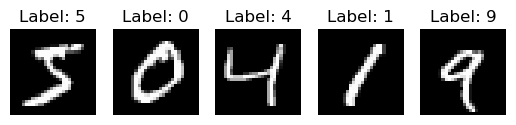

In [2]:
import matplotlib.pyplot as plt

# Display the first five images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title('Label: %d' % train_y[i])
    plt.axis('off')
plt.show()


In [ ]:
Step 3: Build and Train a Keras CNN Classifier
We will now define a simple CNN model and train it on the MNIST training set.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical

# Preprocess the data
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)).astype('float32') / 255
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)).astype('float32') / 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200)





Epoch 1/10


300/300 [==============================] - 3s 8ms/step - loss: 0.2671 - accuracy: 0.9272 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0834 - accuracy: 0.9766 - val_loss: 0.0715 - val_accuracy: 0.9782
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0538 - val_accuracy: 0.9819
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0500 - val_accuracy: 0.9829
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.0553 - val_accuracy: 0.9814
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0489 - val_accuracy: 0.9841
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0209 - accuracy: 0.9941 - val_loss: 0.0477 - val_accuracy: 0.9831
E

Step 4: Report the Test Accuracy of the Model
After training, we evaluate the model on the test set to report its accuracy.

In [4]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9830
Test accuracy: 0.9829999804496765


Step 5: Display a Confusion Matrix on the Test Set Classifications
To display a confusion matrix, I first need to predict the classes for the test set and then compare them with the true labels.

313/313 [==============================] - 0s 1ms/step


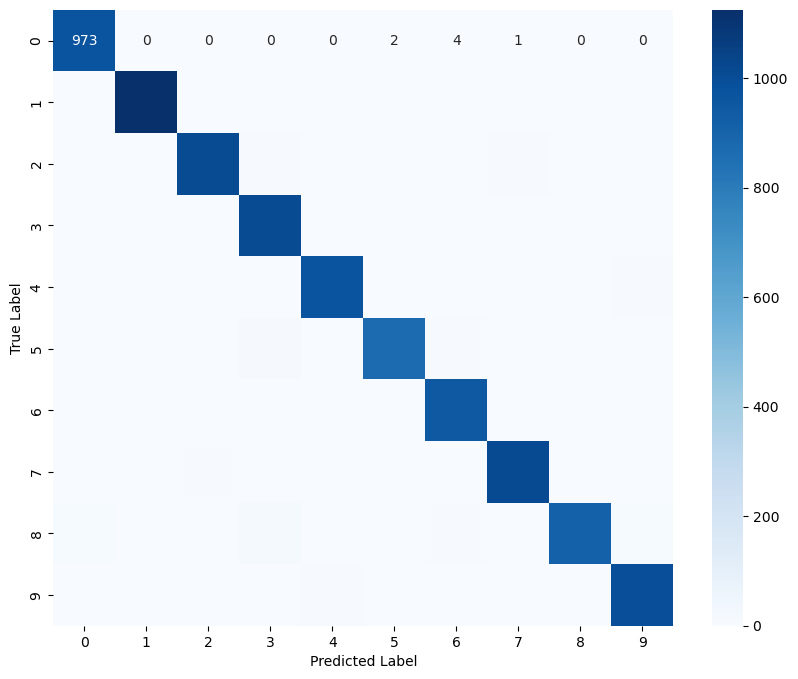

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the test dataset
test_pred = model.predict(test_X)
test_pred_classes = np.argmax(test_pred, axis=1)
test_true = np.argmax(test_y, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_true, test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
